
- **.nsmallest()** -  позволяет выбрать n наименьших значений в Series

- **.nlargest()** - позволяет выбрать n наибольших значений в Series

- **.last()** - можно получить первое непустое значение в группах.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')


covid_df = pd.read_csv('data/covid_df.csv')
covid_df.pop('Unnamed: 0')
covid_df['date'] = pd.to_datetime(covid_df['date'])
covid_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86785 entries, 0 to 86784
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   date                                 86785 non-null  datetime64[ns]
 1   country                              86785 non-null  object        
 2   confirmed                            86785 non-null  float64       
 3   deaths                               86785 non-null  float64       
 4   recovered                            86785 non-null  float64       
 5   active                               86785 non-null  float64       
 6   daily_confirmed                      86564 non-null  float64       
 7   daily_deaths                         86564 non-null  float64       
 8   daily_recovered                      86564 non-null  float64       
 9   total_vaccinations                   10629 non-null  float64       
 10  people_vac


- date — дата наблюдения;

- country — наименование страны;

- confirmed — общее число зафиксированных случаев на указанный день;

- deaths — общее число зафиксированных смертей на указанный день;

- recovered — общее число выздоровлений на указанный день.

- active - общее число больных на данный момент

- daily_confirmed - число прироста заболевших

- daily_deaths - число прироста умерших

- daily_recovered - число прироста выздоровевших

- total_vaccinations — общее число введённых вакцин в стране на указанный день;

- people_vaccinated — общее число привитых первым компонентом в стране на указанный день;

- people_vaccinated_per_hundred — процент привитых первым компонентом в стране на указанный день (рассчитывается как );

- people_fully_vaccinated — общее число привитых вторым компонентом в стране на указанный день (первый компонент уже был введён им ранее);

- people_fully_vaccinated_per_hundred — процент привитых вторым компонентом в стране на указанный день (рассчитывается как );

- daily_vaccination — ежедневная вакцинация (число вакцинированных в указанный день);

- vaccines — комбинации вакцин, используемые в стране.

- death_rate — общий процент смертей среди зафиксированных случаев (летальность) и 

- recover_rate — общий процент случаев выздоровления. 

Основные параметры метода plot()


x — название признака, который будет отложен по оси абсцисс;

y — название признака, который будет отложен по оси ординат;

figsize — размер графика (кортеж из ширины и высоты в дюймах);

kind —тип визуализации. Основные типы:

- 'line' — линейный график (по умолчанию);

- 'bar' — столбчатая диаграмма;

- 'barh' — горизонтальная столбчатая диаграмма;

- 'hist' — гистограмма;

- 'box' — коробчатая диаграмма (boxplot);

- 'pie' — круговая диаграмма;

- 'scatter' — диаграмма рассеяния.

grid — отображение сетки (по умолчанию False);

legend — отображение легенды (по умолчанию False);

title — название графика;

color — цвет.

Теперь мы наконец можем построить график с помощью метода plot(). Будем использовать линейный график размером 12x4 (попробуйте взять другие числа, чтобы увидеть разницу). Подпишем график и отобразим сетку. Параметр lw (line width) отвечает за ширину линии для линейного графика.

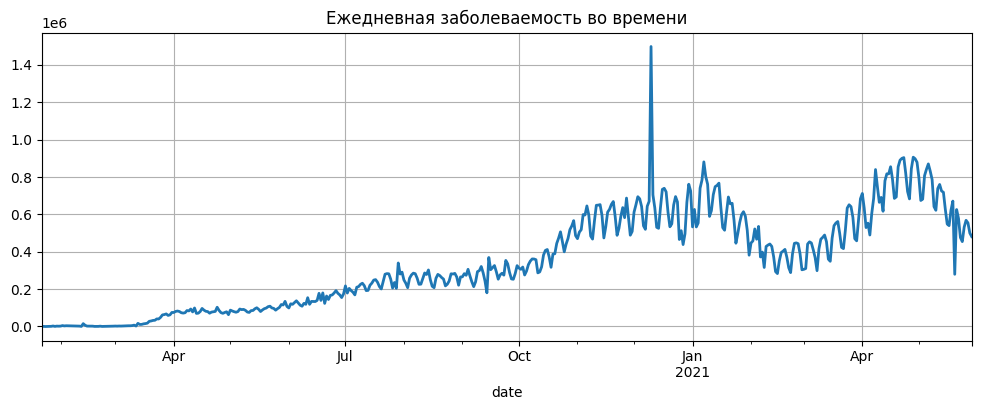

In [2]:
grouped_cases  = covid_df.groupby('date')['daily_confirmed'].sum()
grouped_cases.plot(
    kind='line',
    figsize=(12,4),
    title='Ежедневная заболеваемость во времени',
    grid=True,
    lw=2
);

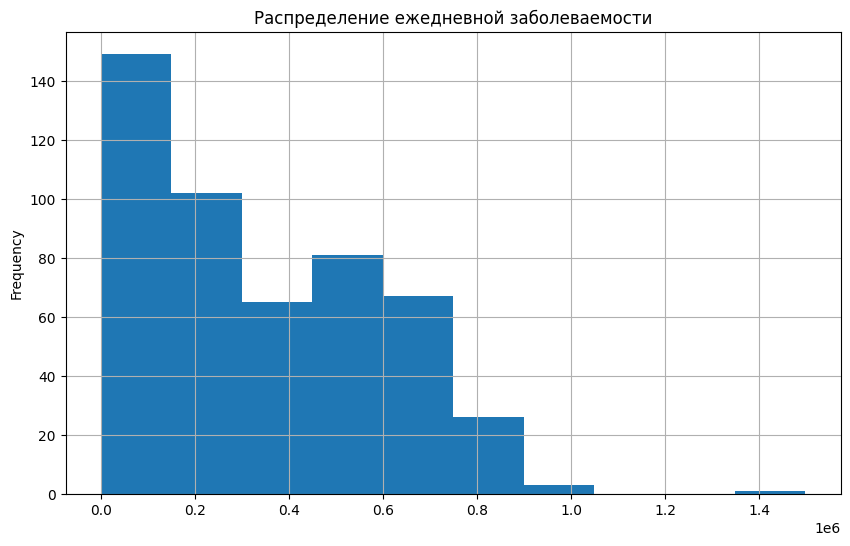

In [3]:
grouped_cases.plot(
    kind='hist',
    figsize=(10,6),
    title="Распределение ежедневной заболеваемости",
    grid=True,
    bins=10
);

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_29208\3830503499.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_country = covid_df.groupby(['country'])['deaths', 'confirmed'].last()


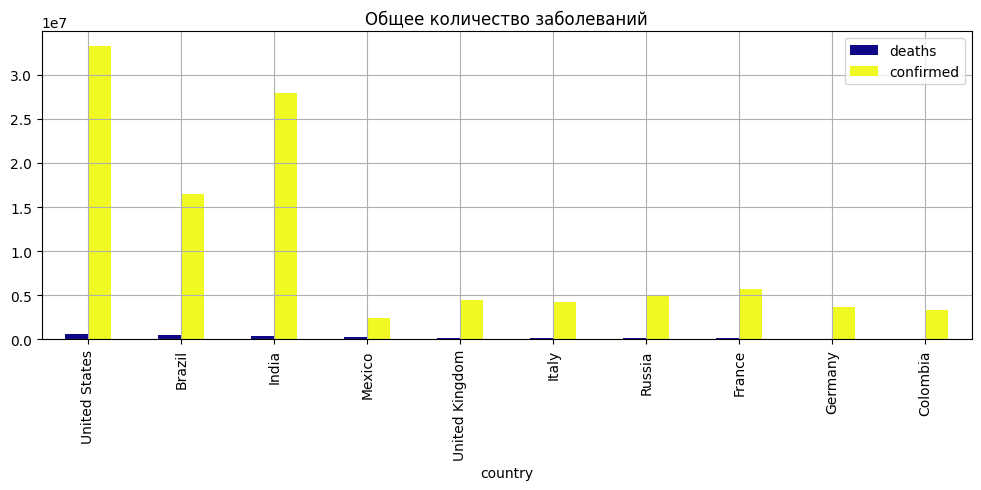

In [4]:
grouped_country = covid_df.groupby(['country'])['deaths', 'confirmed'].last()
grouped_country = grouped_country.nlargest(10,columns='deaths',)
grouped_country.plot(
    kind='bar',
    grid='True',
    figsize=(12,4),
    colormap='plasma',
    title='Общее количество заболеваний'
);

**.nsmallest()** -  позволяет выбрать n наименьших значений в Series
**.nlargest()** - позволяет выбрать n наибольших значений в Series
**.last()** - можно получить первое непустое значение в группах.

<Axes: xlabel='country'>

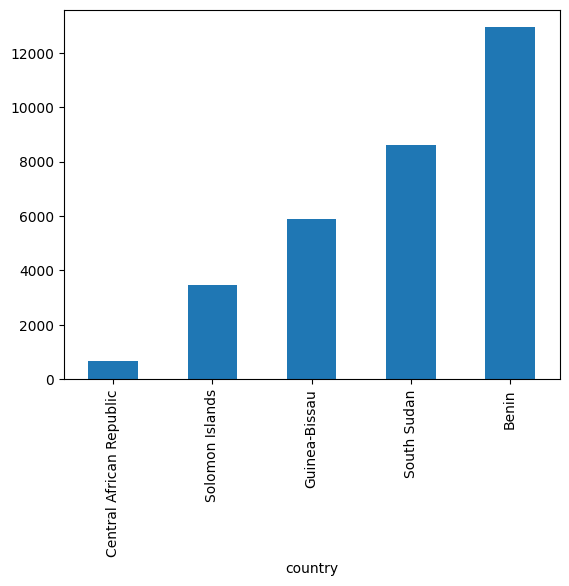

In [5]:
covid_df.groupby('country')['total_vaccinations'].last().nsmallest(5).plot(kind='bar')

### ОСНОВНЫЕ ОБЪЕКТЫ MATPLOTLIB


- axes.set_title() — заголовок диаграммы, а также его настройки (например, параметр fontsize отвечает за размер шрифта);

- axes.set_xlabel() — название оси абсцисс;

- axes.set_ylabel() — название оси ординат;

- axes.set_xticks() — установка отметок на оси абсцисс;

- axes.set_yticks() — установка отметок на оси ординат;

- axes.xaxis.set_tick_params() — управление параметрами отметок на оси абсцисс (например, параметр rotation отвечает за поворот отметок в градусах);

- axes.yaxis.set_tick_params() — управление параметрами отметок на оси ординат;

- axes.legend() — отображение легенды;

- axes.grid() — установка сетки.

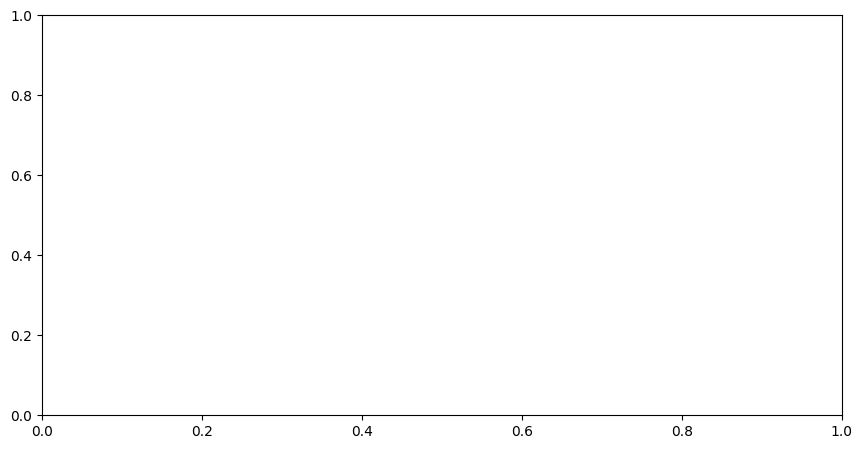

In [6]:
fig = plt.figure(figsize=(8,4))
axes = fig.add_axes([0,0,1,1])

Основные параметры метода scatter()

- x, y — последовательности, которые будут отложены по осям абсцисс и ординат;

- s — размер маркеров;

- marker — вид маркеров ('o' — точки, '^' — треугольники);

- c — цвет маркеров.

Утверждается, что коллективная вакцинация позволяет минимизировать риск заражения коронавирусной инфекцией (но только после второго компонента). Давайте проверим это на примере США: построим диаграмму рассеяния, которая покажет зависимость числа ежедневно обнаруживаемых случаев заражения (daily_confirmed) от общего количества привитых вторым компонентом вакцины (people_fully_vaccinated) в США.

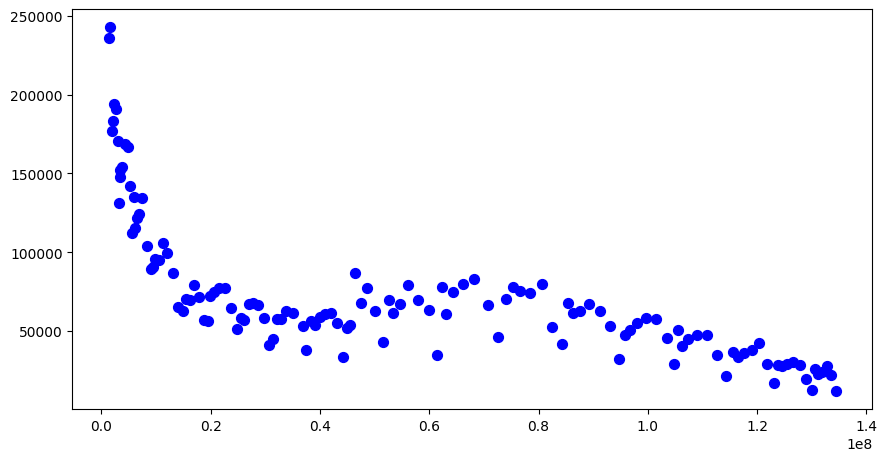

In [7]:
us_data = covid_df[covid_df['country'] == 'United States']

fig = plt.figure(figsize=(8,4))
axes = fig.add_axes([0,0,1,1])

axes.scatter(
    x=us_data['people_fully_vaccinated'],
    y=us_data['daily_confirmed'],
    s=50,
    marker='o',
    c='blue'
)

Основные параметры метода pie()

- x — значения, по которым будет строиться круговая диаграмма;

- labels — метки, соответствующие значениям;

- autopct — формат отображения долей на диаграмме (например, '%.1f%%' означает, что округление будет производиться до первого знака после запятой и при выводе будет указан знак "%"; открывающий и закрывающий проценты означают форматирование, а внутренний — вывод знака "%");

- explode — последовательность, которая определяет долю смещения сектора от центра для каждого

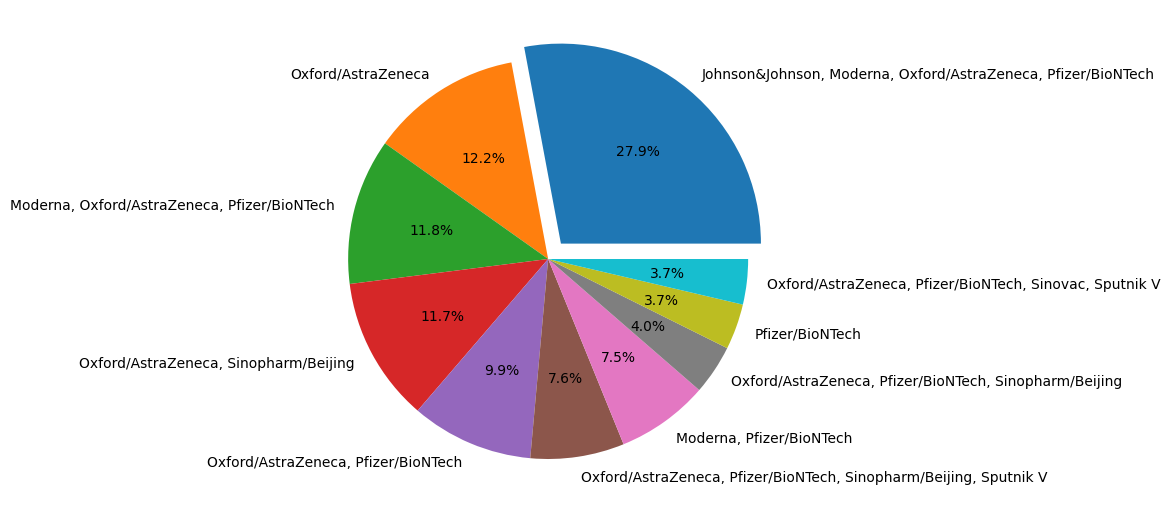

In [8]:
vaccine_combinations = covid_df['vaccines'].value_counts()[:10]
fig = plt.figure(figsize=(5,5))
axes = fig.add_axes([0,0,1,1])
axes.pie(
    x=vaccine_combinations,
    labels=vaccine_combinations.index,
    autopct='%.1f%%',
    explode=[0.1, 0, 0, 0, 0, 0, 0, 0, 0,0]
);

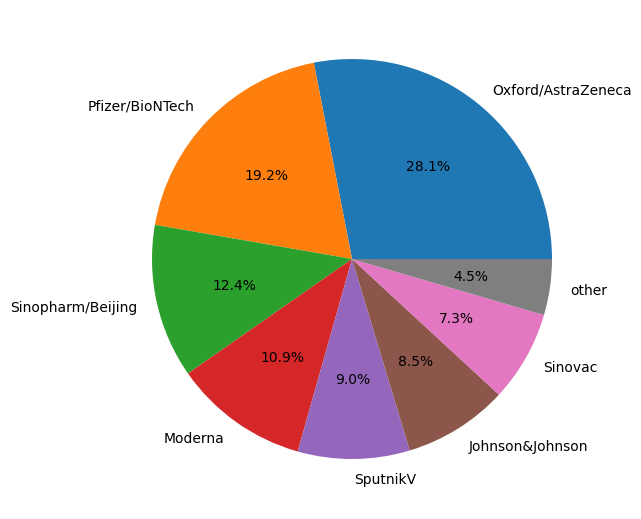

In [9]:
#избавляемся от пропусков в столбце с вакцинами
combination_not_nan = covid_df.dropna(subset=['vaccines'])
#группируем по странам и выбираем последнюю комбинацию вакцин в стране
combination_last = combination_not_nan.groupby(['country'])['vaccines'].last() 
#заменяем пробелы в строках и делим комбинации на отдельные вакцины по запятой
combination_last = combination_last.apply(lambda x: x.replace(' ', '').split(',')) 
#создаём пустой словарь, ключами которого будут вакцины, а значениями — количество стран
vaccines_dict = {} 
#создаём цикл по элементам Series combination_last
for vaccines_list in combination_last:
    #создаём цикл по элементам списка с вакцинами
    for vaccine in vaccines_list:
        #проверяем условие, что текущей вакцины ещё нет среди ключей словаря
        if vaccine not in vaccines_dict:#если условие выполняется
            vaccines_dict[vaccine] = 1 #заносим вакцину в словарь со значением 1
        else: #в противном случае
            vaccines_dict[vaccine] += 1 #увеличивает количество
#преобразуем словарь в Series
vaccines = pd.Series(vaccines_dict).sort_values(ascending=False)
#выделяем ТОП-7 вакцин и добавляем категорию 'other'
vaccines['other'] = vaccines[7:].sum()
vaccines = vaccines.sort_values(ascending=False)[:8]
#строим круговую диаграмму
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    vaccines,
    labels=vaccines.index,
    autopct='%.1f%%',
);

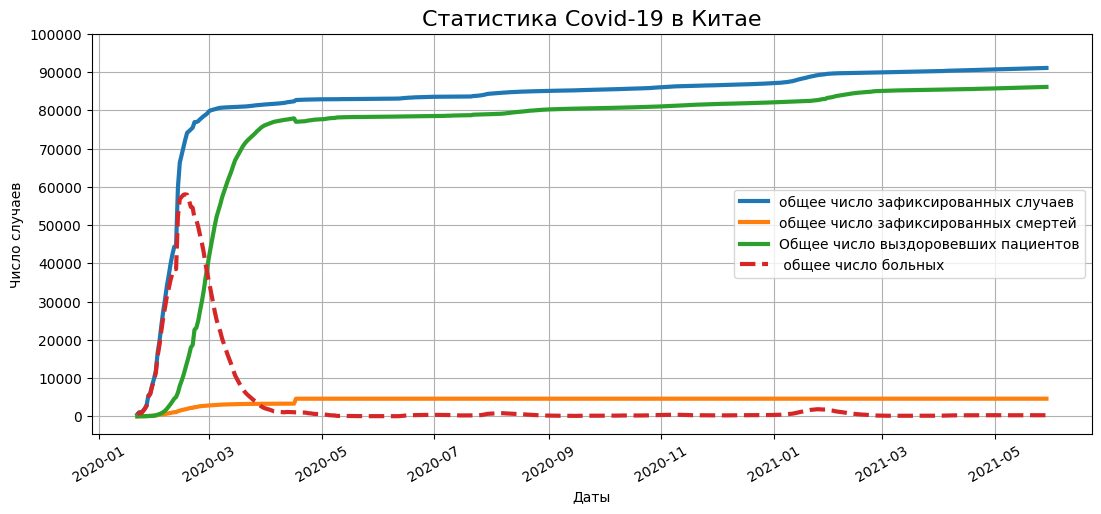

In [10]:
china_data = covid_df[covid_df['country'] == 'China']
china_grouped = china_data.groupby(['date'])[['confirmed', 'active', 'deaths', 'recovered']].sum()

#визуализация графика
fig = plt.figure(figsize=(10,4))
axes = fig.add_axes([0,0,1,1])
axes.plot(china_grouped['confirmed'],label='общее число зафиксированных случаев',lw=3)
axes.plot(china_grouped['deaths'],label='общее число зафиксированных смертей',lw=3)
axes.plot(china_grouped['recovered'],label='Общее число выздоровевших пациентов',lw=3)
axes.plot(china_grouped['active'],label=' общее число больных',lw=3,linestyle='dashed')

#Установка параметров отображения
axes.set_title('Статистика Covid-19 в Китае',fontsize=16)
axes.set_ylabel("Число случаев")
axes.set_xlabel('Даты')
axes.set_yticks(range(0,110000,10000))
axes.xaxis.set_tick_params(rotation=30)
axes.grid()
axes.legend()


Основные параметры метода bar()

- x — названия категорий, которые будут располагаться по оси абсцисс;

- height — высота столбцов диаграммы, массив из показателей для визуализации (например, среднее, максимальное значение и т. д.);

- width — ширина столбцов диаграммы;

- color — цвет.

Например, отобразим ТОП-5 стран по общему числу привитых вторым компонентом людей (people_fully_vaccinated), а также ТОП-5 стран по числу полностью привитых на 100 человек населения (people_fully_vaccinated_per_hundred).

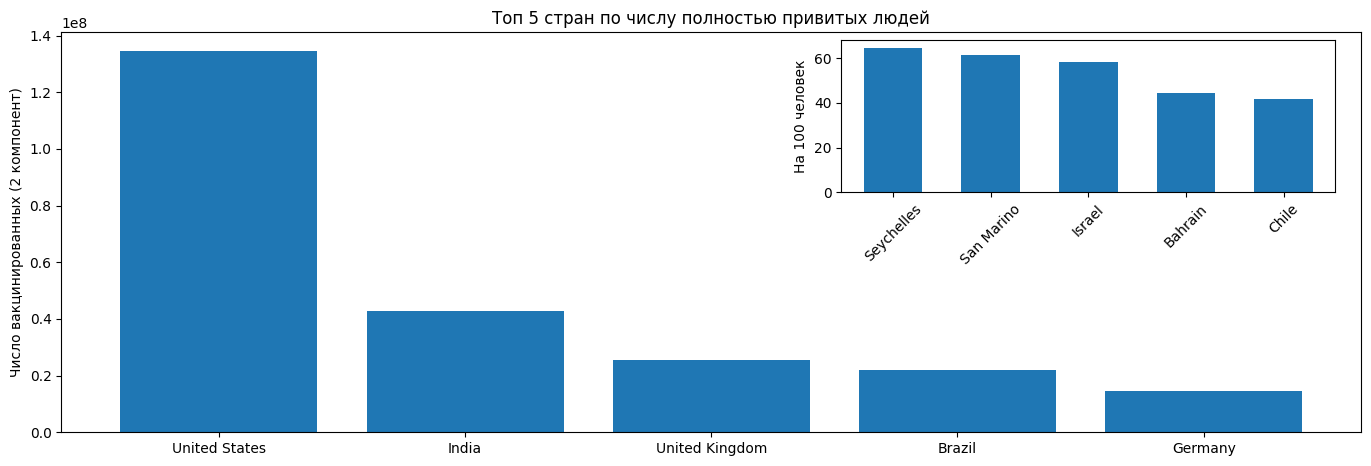

In [11]:
vacc_country = covid_df.groupby('country')['people_fully_vaccinated'].last().nlargest(5)
vacc_country_per_hundred = covid_df.groupby('country')['people_fully_vaccinated_per_hundred'].last().nlargest(5)

fig = plt.figure(figsize=(13,4))
main_axis = fig.add_axes([0,0,1,1])
main_axis.bar(x=vacc_country.index,height=vacc_country)
main_axis.set_ylabel('Число вакцинированных (2 компонент)')
main_axis.set_title('Топ 5 стран по числу полностью привитых людей')

insert_axes = fig.add_axes([0.6, 0.6, 0.38, 0.38])
insert_axes.bar(x=vacc_country_per_hundred.index,height=vacc_country_per_hundred,width=0.6)
insert_axes.set_ylabel('На 100 человек')
insert_axes.xaxis.set_tick_params(rotation = 45)


Основные параметры метода subplots()

- nrows — число строк;

- ncols — число столбцов;

- figsize — общий размер фигуры в дюймах (ширина и высота).

Основные параметры метода hist()

- x — массив чисел, для которого строится гистограмма;

- bins — число столбцов (корзин);

- orientation — ориентация гистограммы (по умолчанию 'vertical');

- color — цвет.

**задача**

- Столбчатую диаграмму, которая покажет динамику ежедневной вакцинации в России.
- Линейный график изменения ежедневной заболеваемости в стране.
- Гистограмму ежедневной заболеваемости в стране.

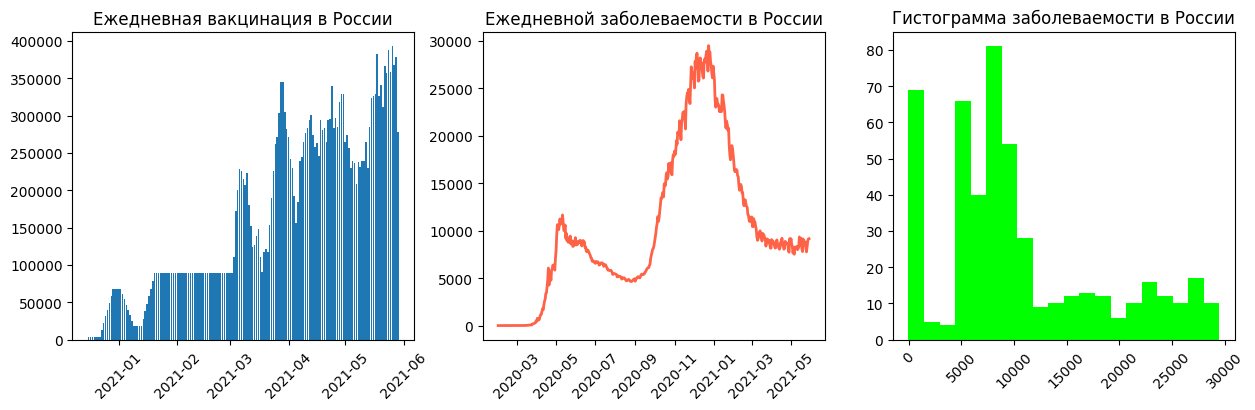

In [33]:
russia_data = covid_df[covid_df['country'] == "Russia"]
fig, axes =plt.subplots(nrows=1,ncols=3,figsize=(15,4))

axes[0].bar(
    x=russia_data['date'],
    height=russia_data['daily_vaccinations'],
    label='Число вакцинированых'
);
axes[0].set_title('Ежедневная вакцинация в России')
axes[0].xaxis.set_tick_params(rotation=45)

axes[1].plot(
    russia_data['date'],
    russia_data['daily_confirmed'],
    label=('Eжедневной заболеваемости в России'),
    color='tomato',
    lw=2
)
axes[1].set_title('Eжедневной заболеваемости в России')
axes[1].xaxis.set_tick_params(rotation=45)

axes[2].hist(
    x=russia_data["daily_confirmed"],
    color='lime',
    bins=20
)

axes[2].set_title('Гистограмма заболеваемости в России')
axes[2].xaxis.set_tick_params(rotation=45)


In [35]:
#covid_df.to_csv('data/covid_dataframe.csv')
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86785 entries, 0 to 86784
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   date                                 86785 non-null  datetime64[ns]
 1   country                              86785 non-null  object        
 2   confirmed                            86785 non-null  float64       
 3   deaths                               86785 non-null  float64       
 4   recovered                            86785 non-null  float64       
 5   active                               86785 non-null  float64       
 6   daily_confirmed                      86564 non-null  float64       
 7   daily_deaths                         86564 non-null  float64       
 8   daily_recovered                      86564 non-null  float64       
 9   total_vaccinations                   10629 non-null  float64       
 10  people_vac